In [2]:
from sklearn import svm
from keras.models import Model
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from edu.javerianacali.process_images import ProcessImages
import tabulate 

directorio = "/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets"


2024-05-31 17:30:14.215012: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 17:30:14.217604: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 17:30:14.251541: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 17:30:15.183288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# AUMENTO DE DATOS

In [ ]:

from edu.javerianacali.data_aumentation import DataAugmentation

DataAugmentation().augment_images(directorio+'/poquitas'

)

# PROCESAR INAGENES PARA MODELOS DE APRENDIZAJE SUPERVISADO

In [ ]:
path=directorio+'/poquitas'
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith((".jpg", ".JPG", ".jpeg", ".png")):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,200,200)
        ProcessImages().mostrar_imagenes(titulos, imagenes)



In [3]:


from edu.javerianacali.create_dataset import CreateDataSet
create_dataset = CreateDataSet().create_dataset(directorio)
features, labels = create_dataset[0], create_dataset[1]


['fil_Heilipus (525).jpg', 'fil_Heilipus (539).jpg', 'fil_sano(68).jpg', 'fil_Heilipus (105).jpg', 'fil_Heilipus (84).jpg', 'fil_Heilipus (342).jpg', 'fil_Sano_P13_60 degrees.JPG', 'fil_Sano_P18_100 degrees.JPG', 'fil_Heilipus (277).jpg', 'fil_Heilipus (44).jpg', 'fil_Heilipus (361).jpg', 'fil_Heilipus (262).jpg', 'fil_Sano_sano(564).jpg', 'fil_Heilipus (519).jpg', 'fil_Heilipus (384).jpg', 'fil_Heilipus (110).jpg', 'fil_Heilipus (393).jpg', 'fil_Heilipus (168).jpg', 'fil_Heilipus (13).jpg', 'fil_Heilipus (218).jpg', 'fil_Heilipus (97).jpg', 'fil_Heilipus (107).jpg', 'fil_Heilipus (530).jpg', 'fil_Heilipus (422).jpg', 'fil_Heilipus (79).jpg', 'fil_Heilipus (76).jpg', 'fil_Heilipus (556).jpg', 'fil_Heilipus (248).jpg', 'fil_Heilipus (300).jpg', 'fil_Heilipus (430).jpg', 'fil_Heilipus (39).jpg', 'fil_Heilipus (211).jpg', 'fil_Heilipus (65).jpg', 'fil_Heilipus (274).jpg', 'fil_Heilipus (488).jpg', 'fil_Heilipus (502).jpg', 'fil_Heilipus (297).jpg', 'fil_Heilipus (375).jpg', 'fil_Heilipus 

In [4]:
# Convertir la lista aplanada en un array de NumPy
X = np.array(features)
y = np.array(labels)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo SVM
model = svm.SVC(kernel='linear', probability=True)

# Entrenar el modelo SVM
model.fit(X_train, y_train)

# Predecir etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


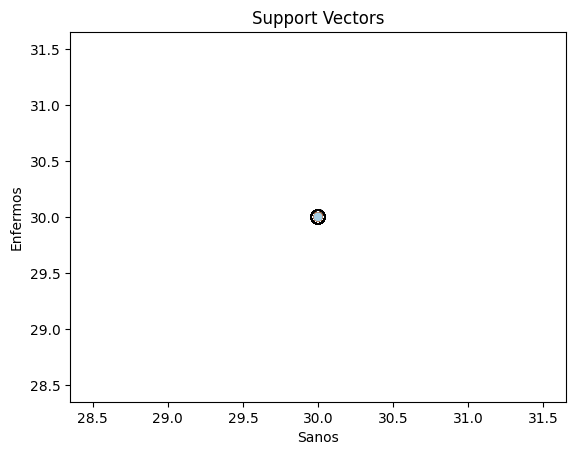

In [5]:
support_vectors = model.support_vectors_

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='k', s=100)
plt.title("Support Vectors")
plt.xlabel("Sanos")
plt.ylabel("Enfermos")
plt.show()

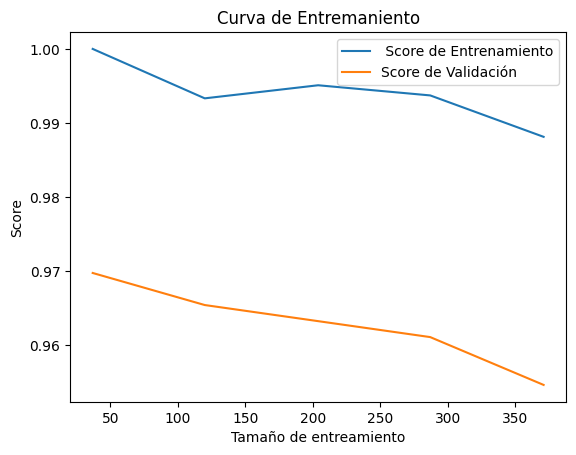

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model, X_train.reshape(len(X_train), -1), y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label=' Score de Entrenamiento')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Score de Validación')
plt.xlabel('Tamaño de entreamiento')
plt.ylabel('Score')
plt.title('Curva de Entremaniento')
plt.legend()
plt.show()

Confusion Matrix
[[ 27   7]
 [  5 161]]


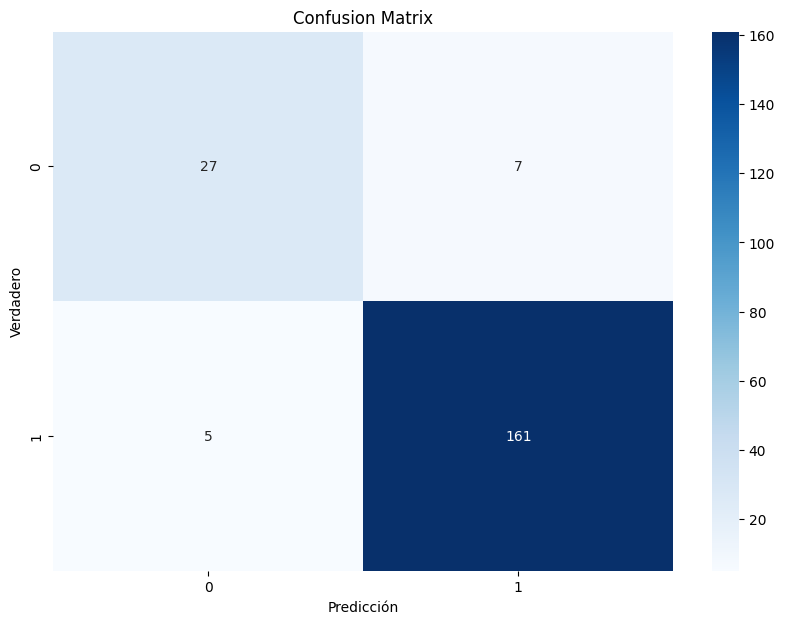

Classification Report
{'0': {'precision': 0.84375, 'recall': 0.7941176470588235, 'f1-score': 0.8181818181818182, 'support': 34.0}, '1': {'precision': 0.9583333333333334, 'recall': 0.9698795180722891, 'f1-score': 0.9640718562874252, 'support': 166.0}, 'accuracy': 0.94, 'macro avg': {'precision': 0.9010416666666667, 'recall': 0.8819985825655563, 'f1-score': 0.8911268372346217, 'support': 200.0}, 'weighted avg': {'precision': 0.9388541666666668, 'recall': 0.94, 'f1-score': 0.939270549809472, 'support': 200.0}}


,precision,recall,f1-score,support
0,0.843750,0.794118,0.818182,34.000000
1,0.958333,0.969880,0.964072,166.000000
accuracy,0.940000,0.940000,0.940000,0.940000
macro avg,0.901042,0.881999,0.891127,200.000000
weighted avg,0.938854,0.940000,0.939271,200.000000


In [7]:

# Matriz de confusión
print("Confusion Matrix")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Visualización de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Confusion Matrix')
plt.show()


# Informe de clasificación

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report")
print(report)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report_cnn.csv', index=True)

cm = sns.light_palette("blue", as_cmap=True)
styled_df = report_df.style.background_gradient(cmap=cm)
display(styled_df)


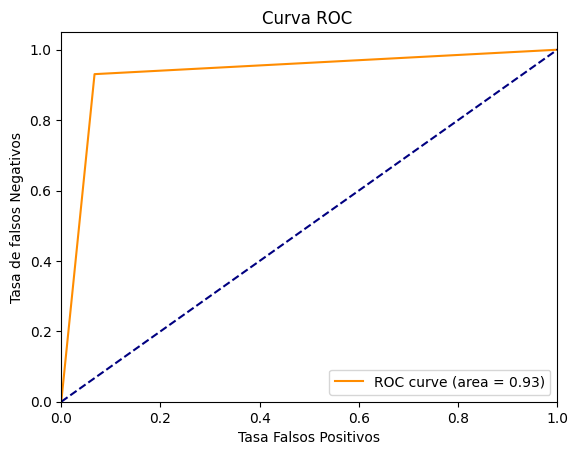

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Si y_pred es unidimensional, no necesitas indexarlo con [:, 1]
if y_pred.ndim == 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Visualización de la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa de falsos Negativos')
    plt.title('Curva ROC ')
    plt.legend(loc="lower right")
    plt.show()